In [1]:
%pip install -U numpy ffmpeg moviepy pyarrow pandas tqdm opencv-python

  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5
ERROR: Cannot uninstall opencv-python 4.5.5, RECORD file not found. Hint: The package was installed by conda.
You should consider upgrading via the '/home/nick/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import cv2
from tqdm import tqdm
from moviepy.editor import *
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
run='20220401095924'
base_path='/u02/data/griffith-uni-2022-custom_classifier'
parquet_path=base_path+'/parquet'
images_path=base_path+'/images'

In [4]:
images_df = pq.read_table(parquet_path+'/left_image_'+run+'.parquet').to_pandas()
# images_df = pq.read_table(parquet_path+'/right_image_'+run+'.parquet').to_pandas()

In [5]:
def load_image(images_path, idx):
    image_row = images_df.iloc[idx]
    image_oid=image_row['image_oid']
    image_file=images_path+'/'+image_oid+'.webp'

    img = cv2.imread(image_file)

    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
images_df.index

RangeIndex(start=0, stop=1736, step=1)

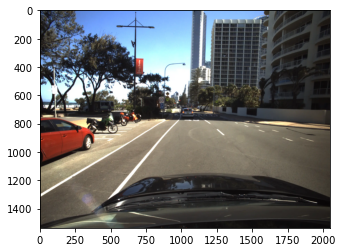

In [7]:
test_img=load_image(images_path,1000)
plt.imshow(test_img)

In [8]:
def create_movie(clip_name='image_clip.mp4', sample_every=1):
    
    clip_data=[load_image(images_path, idx) for idx in images_df.index if not idx % sample_every]
    clip = ImageSequenceClip(clip_data,fps=60)
    %time clip.write_videofile(clip_name, audio=False)
    return clip

In [ ]:
clip_name='image_'+run+'.mp4'
clip=create_movie(clip_name)

In [ ]:
# careful this embeds the video in the notebook and makes it rather large
# clip.ipython_display(width=1024)